# <span style = "color:DarkMagenta;font-size:40px"> Fashion MNIST </span>

***

## About the dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.



## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

<b>Labels</b>
 * 0 - T-shirt/top
 * 1 - Trouser
 * 2 - Pullover
 * 3 - Dress
 * 4 - Coat
 * 5 - Sandal
 * 6 - Shirt
 * 7 - Sneaker
 * 8 - Bag
 * 9 - Ankle Boot

## Let's Get Started

### Import all necessary libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


### Read 'fashion_mnist.csv' and store it in a dataframe

In [120]:
df = pd.read_csv('fashion_mnist.csv')

### View the dataset

In [121]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### View the columns in the dataset

In [42]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

### Check the shape of the dataset

In [43]:
df.shape

(60000, 785)

### Split the dataset into X and y(Input and Target Variables)

In [122]:
x = df.drop(columns='label')
y = df['label']

### Check the shape of X

In [45]:
x.shape

(60000, 784)

### Check the shape of y

In [46]:
y.shape

(60000,)

### Reshape X to (len(X), 28,28,1)

In [65]:
np.ndim(x)    

2

In [123]:
x = np.reshape(x.values,(len(x),28,28,1))

In [74]:
x.shape

(60000, 28, 28, 1)

### Normalise the data

In [124]:
x = x/255

In [76]:
x

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

### Plot some of the figures

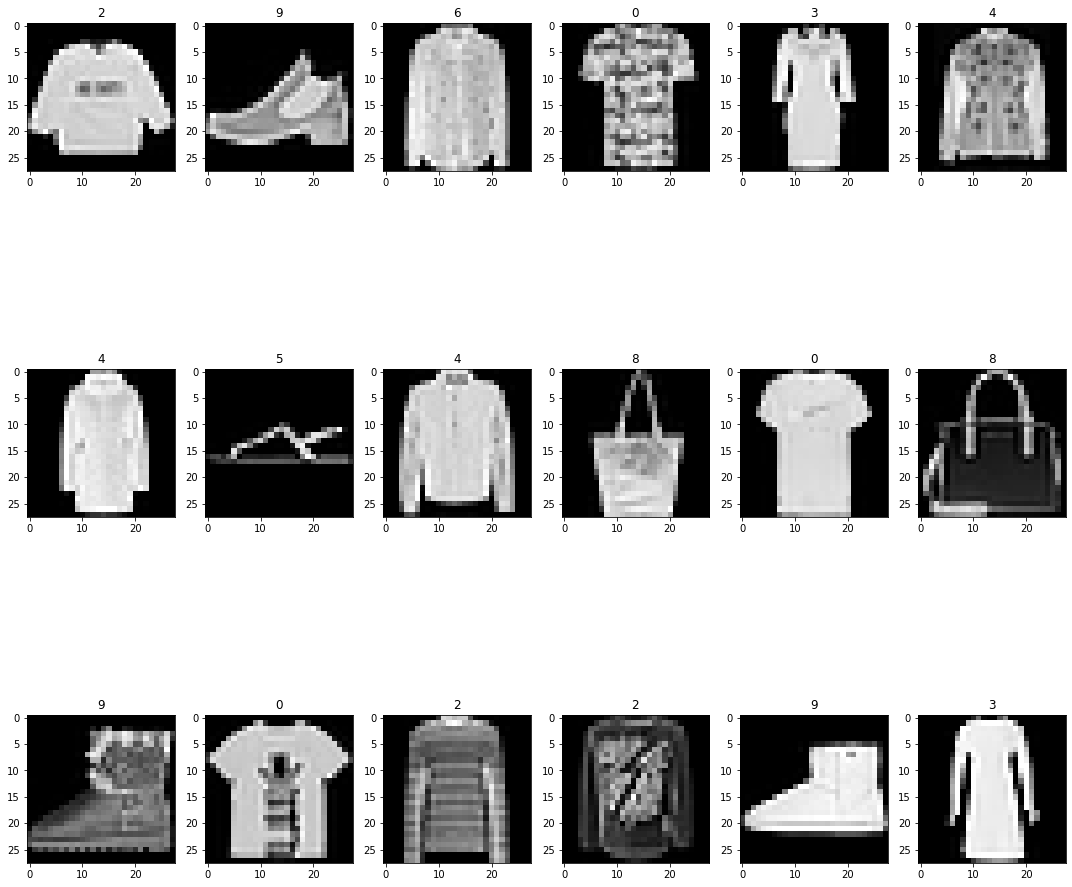

In [125]:
plt.figure(figsize=(15,16))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.imshow(x[i],cmap='gray')
    plt.title(y[i])
plt.tight_layout()

### Split the dataset into Training and Testing set

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

### Check the shape of X_train and X_test

In [82]:
xtrain.shape

(48000, 28, 28, 1)

In [83]:
xtest.shape

(12000, 28, 28, 1)

### Create a keras Sequential model with 2 hidden layers

In [128]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [129]:
model = Sequential([layers.Flatten(input_shape=(28,28)),
                    layers.Dense(100,activation='relu'),
                    layers.Dense(100,activation='relu'),
                    layers.Dense(10,activation='sigmoid')])

### Compile Keras Model

In [130]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

### Check summary of the model

In [131]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [132]:
model.fit(xtrain,ytrain,epochs=10,validation_split=0.05)

Epoch 1/10
1425/1425 [==============================] - 2s 1ms/step - loss: 0.5253 - accuracy: 0.8125 - val_loss: 0.4573 - val_accuracy: 0.8350
Epoch 2/10
1425/1425 [==============================] - 1s 913us/step - loss: 0.3917 - accuracy: 0.8574 - val_loss: 0.3769 - val_accuracy: 0.8658
Epoch 3/10
1425/1425 [==============================] - 1s 936us/step - loss: 0.3501 - accuracy: 0.8697 - val_loss: 0.3803 - val_accuracy: 0.8704
Epoch 4/10
1425/1425 [==============================] - 1s 916us/step - loss: 0.3259 - accuracy: 0.8802 - val_loss: 0.3975 - val_accuracy: 0.8604
Epoch 5/10
1425/1425 [==============================] - 1s 916us/step - loss: 0.3079 - accuracy: 0.8861 - val_loss: 0.3255 - val_accuracy: 0.8879
Epoch 6/10
1425/1425 [==============================] - 1s 943us/step - loss: 0.2903 - accuracy: 0.8917 - val_loss: 0.3477 - val_accuracy: 0.8813
Epoch 7/10
1425/1425 [==============================] - 1s 922us/step - loss: 0.2786 - accuracy: 0.8943 - val_loss: 0.3536 - v

### Evaluate the model

In [133]:
model.evaluate(xtrain,ytrain)

1500/1500 [==============================] - 1s 750us/step - loss: 0.2386 - accuracy: 0.9081


[0.23860561847686768, 0.9080625176429749]

### Make predictions

In [134]:
y_pred = model.predict(xtest)

In [111]:
y_pred

array([[2.8872421e-01, 8.3449483e-03, 7.9264194e-02, ..., 1.1483543e-05,
        1.2606829e-02, 4.3046635e-05],
       [1.8986610e-05, 1.0000000e+00, 6.8719615e-05, ..., 7.1056078e-11,
        9.7433436e-08, 3.9667894e-10],
       [8.2254141e-05, 3.4190218e-12, 4.5903635e-13, ..., 1.0437478e-06,
        2.1443668e-07, 5.8037043e-04],
       ...,
       [5.9804863e-01, 9.3880296e-03, 2.3413241e-02, ..., 2.3001837e-07,
        8.1945866e-02, 2.2663809e-05],
       [4.9434304e-03, 3.7805951e-06, 1.8357283e-05, ..., 9.7640026e-01,
        1.7023385e-03, 2.3410022e-03],
       [9.3936324e-03, 9.9974465e-01, 4.3768287e-03, ..., 6.5079455e-08,
        1.8468499e-04, 7.3386595e-06]], dtype=float32)

In [32]:
prediction

array([[2.9238379e-11, 3.9310838e-12, 1.7195741e-14, ..., 6.9916583e-05,
        1.4265680e-09, 9.9800181e-01],
       [4.5747191e-02, 1.8457472e-03, 1.9778021e-05, ..., 5.9668994e-09,
        9.2662631e-06, 3.5205077e-09],
       [1.9861120e-06, 3.3468062e-10, 7.5695217e-03, ..., 1.7376534e-12,
        1.0255584e-09, 4.2732432e-12],
       ...,
       [1.0926694e-01, 6.3787238e-06, 1.9151688e-02, ..., 1.0173729e-05,
        5.1701069e-04, 2.0775246e-06],
       [4.9824814e-12, 3.4265282e-24, 5.7578933e-16, ..., 8.1231612e-14,
        1.5889755e-14, 6.3005014e-12],
       [4.5047054e-05, 1.3519465e-07, 1.5322566e-03, ..., 2.4951332e-09,
        7.2405628e-06, 1.1394420e-08]], dtype=float32)

### Create a dictionary with Key from 0 to 1 and values of labels

In [135]:
fashion = {0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

In [113]:
fashion

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

### Store all predicted values as numbers in a list

In [151]:
pred = [np.argmax(i) for i in y_pred]

pred



[1,
 2,
 7,
 7,
 2,
 1,
 1,
 1,
 7,
 0,
 7,
 6,
 3,
 9,
 8,
 5,
 3,
 7,
 2,
 7,
 4,
 9,
 7,
 3,
 9,
 1,
 1,
 0,
 0,
 2,
 5,
 1,
 0,
 7,
 8,
 5,
 9,
 0,
 7,
 7,
 4,
 4,
 3,
 1,
 7,
 5,
 6,
 5,
 8,
 6,
 2,
 4,
 9,
 1,
 7,
 5,
 9,
 4,
 0,
 6,
 1,
 9,
 2,
 1,
 5,
 5,
 2,
 8,
 3,
 1,
 2,
 3,
 0,
 2,
 0,
 0,
 6,
 0,
 3,
 9,
 7,
 1,
 7,
 8,
 6,
 7,
 5,
 3,
 5,
 5,
 7,
 4,
 9,
 6,
 1,
 9,
 3,
 2,
 4,
 8,
 4,
 3,
 8,
 3,
 3,
 7,
 1,
 4,
 9,
 1,
 9,
 7,
 5,
 7,
 1,
 1,
 2,
 0,
 4,
 2,
 0,
 6,
 5,
 9,
 8,
 4,
 2,
 5,
 8,
 3,
 9,
 3,
 0,
 4,
 4,
 3,
 8,
 5,
 3,
 3,
 3,
 9,
 1,
 7,
 1,
 4,
 4,
 0,
 7,
 8,
 6,
 1,
 0,
 8,
 7,
 8,
 2,
 2,
 3,
 4,
 5,
 5,
 5,
 1,
 3,
 2,
 1,
 6,
 8,
 1,
 9,
 9,
 2,
 0,
 3,
 3,
 7,
 6,
 7,
 8,
 4,
 3,
 8,
 9,
 2,
 2,
 7,
 6,
 5,
 8,
 3,
 1,
 1,
 6,
 9,
 1,
 0,
 5,
 3,
 1,
 8,
 1,
 6,
 7,
 8,
 9,
 1,
 9,
 8,
 3,
 8,
 8,
 8,
 9,
 8,
 0,
 6,
 1,
 0,
 1,
 5,
 3,
 8,
 5,
 5,
 2,
 0,
 1,
 6,
 7,
 4,
 2,
 4,
 4,
 4,
 8,
 8,
 9,
 0,
 4,
 2,
 3,
 9,
 5,
 9,
 5,
 5,
 4,
 6,
 9,


In [119]:
ypred

[dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'])]

In [152]:
def fash():
    if pred[i] == fashion.keys():
        return fashion.values()[i]

In [157]:
pred
    

[1,
 2,
 7,
 7,
 2,
 1,
 1,
 1,
 7,
 0,
 7,
 6,
 3,
 9,
 8,
 5,
 3,
 7,
 2,
 7,
 4,
 9,
 7,
 3,
 9,
 1,
 1,
 0,
 0,
 2,
 5,
 1,
 0,
 7,
 8,
 5,
 9,
 0,
 7,
 7,
 4,
 4,
 3,
 1,
 7,
 5,
 6,
 5,
 8,
 6,
 2,
 4,
 9,
 1,
 7,
 5,
 9,
 4,
 0,
 6,
 1,
 9,
 2,
 1,
 5,
 5,
 2,
 8,
 3,
 1,
 2,
 3,
 0,
 2,
 0,
 0,
 6,
 0,
 3,
 9,
 7,
 1,
 7,
 8,
 6,
 7,
 5,
 3,
 5,
 5,
 7,
 4,
 9,
 6,
 1,
 9,
 3,
 2,
 4,
 8,
 4,
 3,
 8,
 3,
 3,
 7,
 1,
 4,
 9,
 1,
 9,
 7,
 5,
 7,
 1,
 1,
 2,
 0,
 4,
 2,
 0,
 6,
 5,
 9,
 8,
 4,
 2,
 5,
 8,
 3,
 9,
 3,
 0,
 4,
 4,
 3,
 8,
 5,
 3,
 3,
 3,
 9,
 1,
 7,
 1,
 4,
 4,
 0,
 7,
 8,
 6,
 1,
 0,
 8,
 7,
 8,
 2,
 2,
 3,
 4,
 5,
 5,
 5,
 1,
 3,
 2,
 1,
 6,
 8,
 1,
 9,
 9,
 2,
 0,
 3,
 3,
 7,
 6,
 7,
 8,
 4,
 3,
 8,
 9,
 2,
 2,
 7,
 6,
 5,
 8,
 3,
 1,
 1,
 6,
 9,
 1,
 0,
 5,
 3,
 1,
 8,
 1,
 6,
 7,
 8,
 9,
 1,
 9,
 8,
 3,
 8,
 8,
 8,
 9,
 8,
 0,
 6,
 1,
 0,
 1,
 5,
 3,
 8,
 5,
 5,
 2,
 0,
 1,
 6,
 7,
 4,
 2,
 4,
 4,
 4,
 8,
 8,
 9,
 0,
 4,
 2,
 3,
 9,
 5,
 9,
 5,
 5,
 4,
 6,
 9,


### Plot the first few figures in X_test along with its labels from y_test

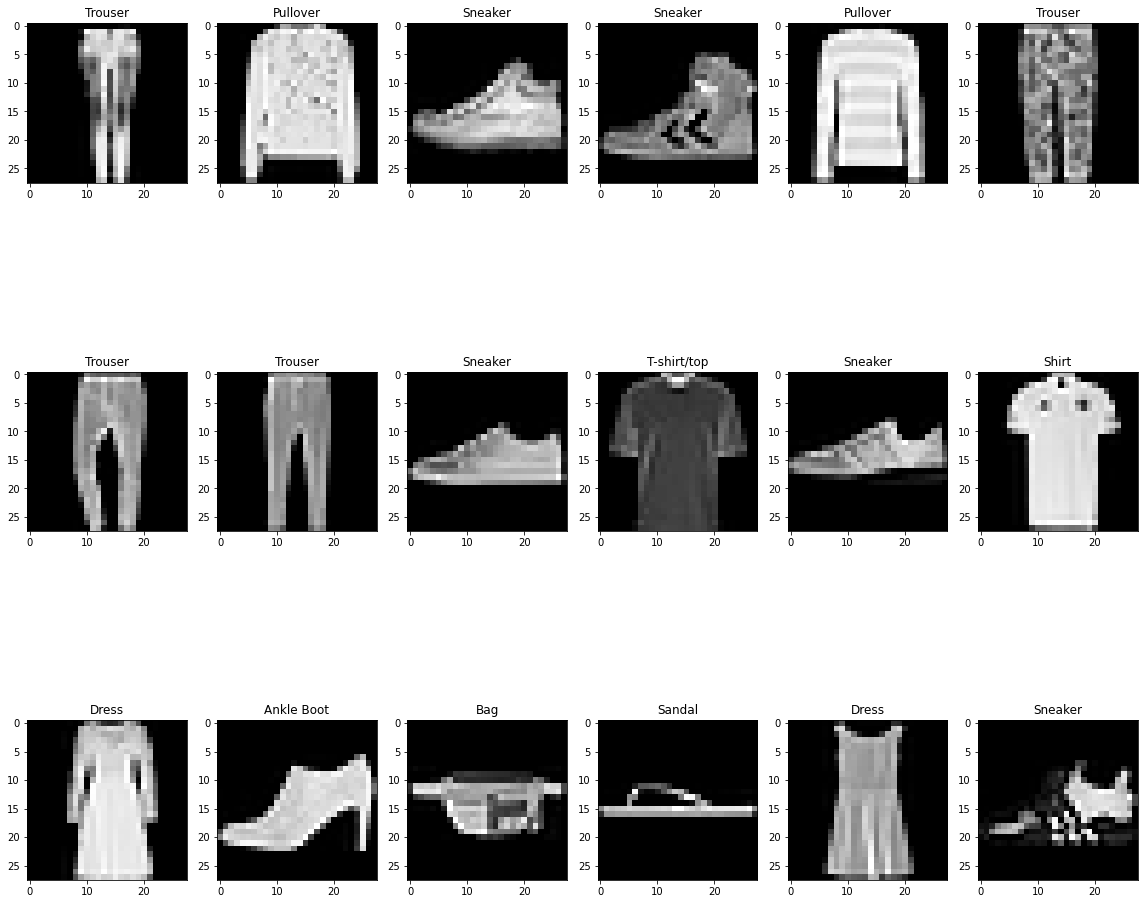

In [158]:
plt.figure(figsize=(16,16))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.imshow(xtest[i],cmap='gray')
    plt.title(fashion[pred[i]] )
plt.tight_layout()

In [85]:
y_test.reset_index(drop = True, inplace = True)

### Plot the accuracy of our prediction

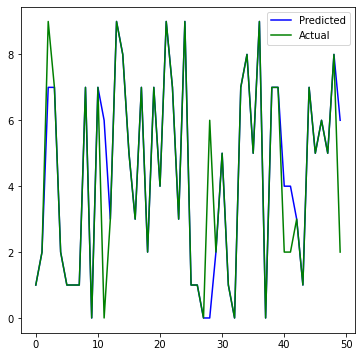

In [159]:
c = range(len(pred))
plt.figure(figsize=(6,6))
plt.plot(c[:50],pred[:50],color='blue')
plt.plot(c[:50],ytest[:50],color='green')
plt.legend(['Predicted','Actual'])
plt.show()

### Plot confusion matrix on a heatmap

In [160]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<AxesSubplot:>

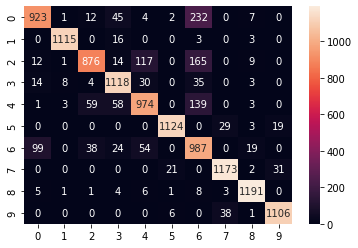

In [161]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

***